In [72]:
import pandas as pd
import numpy as np

import statsmodels.api as sm

In [73]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
milk = pd.read_csv('monthly-milk-production.csv', ';',
                   index_col=['month'], parse_dates=['month'], dayfirst=True)

In [75]:
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


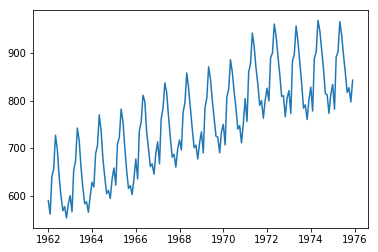

In [76]:
plt.plot(milk);

In [77]:
print("{:.2f}".format(sm.tsa.stattools.adfuller(milk.milk)[1]))

0.63


Часто, когда вы имеете дело с величинами, представляющими собой сумму значений показателя за каждый день или за каждый рабочий день, имеет смысл перед началом прогнозирования поделить весь ряд на число дней в периоде. Например, если поделить ряд с объёмом производства молока на одну корову на число дней в месяце, полученная величина будет меняться более плавно, и для неё легче будет построить прогнозирующую модель.

Корректно определить число дней в месяце можно с помощью свойства days_in_month у индекса ряда или функции monthrange из пакета calendar. Используйте число дней в месяце для того, чтобы вычислить новый показатель — среднее дневное число полученного молока на одну корову. Постройте график этого ряда и убедитесь, что он стал более гладким.

В качестве ответа введите сумму значений полученного показателя за весь период; округлите до двух знаков после десятичной точки.

In [87]:
milk['daily'] = milk.milk/milk.index.days_in_month

In [89]:
print("{:.2f}".format(milk.daily.sum()))

4166.33


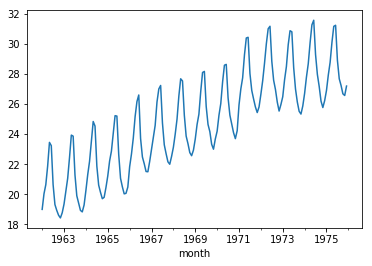

In [90]:
milk.daily.plot();

In [100]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)
milk['daily_diff1_12'] = milk.daily_diff1 - milk.daily_diff1.shift(12)

In [101]:
print("{:.2f}".format(sm.tsa.stattools.adfuller(milk.daily_diff1_12.dropna())[1]))

0.00


In [124]:
milk.tail()

,milk,daily,daily_diff1,daily_diff12,daily_diff1_12
month,,,,,
1975-08-01,858,27.677419,-1.225806,-0.290323,0.096774
1975-09-01,817,27.233333,-0.444086,0.066667,0.356989
1975-10-01,827,26.677419,-0.555914,0.483871,0.417204
1975-11-01,797,26.566667,-0.110753,0.800000,0.316129
1975-12-01,843,27.193548,0.626882,0.967742,0.167742


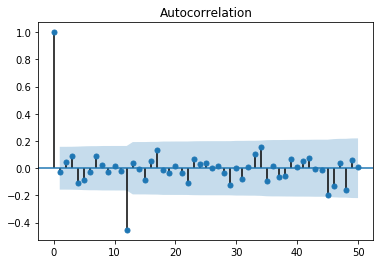

In [116]:
sm.graphics.tsa.plot_acf(
    milk['daily_diff1_12'].dropna().values.squeeze(), lags=50);

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра QQQ в модели SARIMA?

**Ответ: 1**

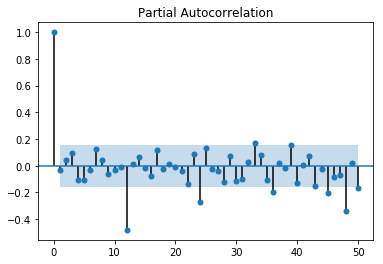

In [121]:
sm.graphics.tsa.plot_pacf(
    milk['daily_diff1_12'].dropna().values.squeeze(), lags=50);

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра ppp в модели SARIMA?

Ответ: **0**